<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/hair_labeling/check_labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install -q tensorflow-io

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
!pip install -q pydicom

In [ ]:
# p = mdai_client.project('PVq9raBJ', path='/content/gdrive/My Drive/ISIC-melanoma/hair_labeling/')
from PIL import Image
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_files

# define location of dataset
folder = '/content/gdrive/My Drive/ISIC-melanoma/train/'
folder2 = '/content/gdrive/My Drive/ISIC-melanoma/hair_labeling/'
# plot first few images
hair_label = []
image_field = []

# start_num = 15719
# end_num = 100000

# start_num = 100000
# end_num = 405555

start_num = 405652
end_num = 695029

# start_num = 695059
# end_num = 999642

# start_num = 1000328
# end_num = 1307396

# start_num = 1307419
# end_num = 1601764

# start_num = 1601784
# end_num = 1894741

# start_num = 1894782
# end_num = 2188465

# start_num = 2188566
# end_num = 2491594

file_name = str(start_num) + '_' + str(end_num) + '.csv'

target_row = 1

file_startname = 'ISIC_00'

if 1000000 > start_num >= 100000:
  file_startname = 'ISIC_0'
elif start_num >= 1000000:
  file_startname = 'ISIC_'

# for i in range(1, 1002):
#   f_read = open('{}/{}{}.csv'.for)

In [ ]:
import csv

hair_image_file = []

ct = 1

with open(folder2 + file_name, newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        if i[1] == '1':
          hair_image_file.append(i[0])
        ct += 1

original image


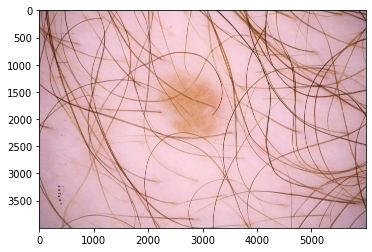

Image size.......: 4000 x 6000, 2396662 bytes
Slice location...: (missing)
file name :  ISIC_0513392


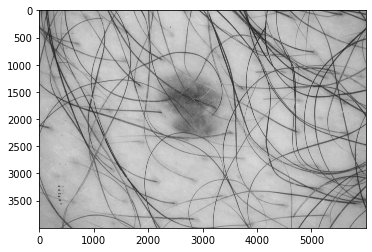

(0 : no hair | 1 : hair)1
original image


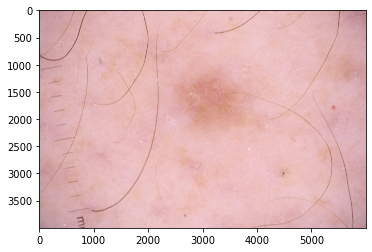

Image size.......: 4000 x 6000, 1433484 bytes
Slice location...: (missing)
file name :  ISIC_0515794


In [ ]:
for i in range (135, ct + 1):
  if os.path.isfile(folder + hair_image_file[i] + '.dcm'):
    filename = folder + hair_image_file[i] + '.dcm'
    dataset = pydicom.dcmread(filename)

    image_bytes = tf.io.read_file(filename)

    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

    skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

    print("original image")
    plt.imshow(np.squeeze(image.numpy()))
    # plt.set_title('original image')
    plt.show()

    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

    # use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", dataset.get('SliceLocation', "(missing)"))
    print("file name : ", hair_image_file[i])

    image = cv2.cvtColor(dataset.pixel_array, cv2.COLOR_BGR2GRAY)

    plt.imshow(image, cmap='gray')
    plt.show()

    label = input('(0 : no hair | 1 : hair)');
    hair_label.append(label)
    image_field.append(hair_image_file[i])



In [ ]:
print(hair_label)
print(image_field)

In [ ]:
df1 = pd.DataFrame({"image_name" : image_field})
df2 = pd.DataFrame({"hair" : hair_label})

data = pd.merge(df1, df2, right_index=True, left_index=True)
data.to_csv(folder2 + "(check_done)hair_labeling" + str(513392) + "_" + str(end_num)  + ".csv", header=True, index=False)

data